In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
import xgboost
from sklearn import svm
from xgboost import XGBClassifier, plot_importance
import pickle as pk
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


C:\Users\VICKFURY\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
diabetesdataurl='app\\static\\Datasets\\diabetes.csv'

diabetesdata_cp= pd.read_csv(diabetesdataurl)
diabetesdata=diabetesdata_cp.copy(deep=True)
diabetesdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetesdata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetesdata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetesdata.dropna(inplace=True,axis=0)


# diabetesdata[['Glucose','BloodPressure',]] = diabetesdata[['Glucose','BloodPressure']].replace(0,np.NaN)
# diabetesdata.dropna(inplace=True,axis=0)
# diabetesdata['SkinThickness']=diabetesdata['SkinThickness'].replace(0,np.median(diabetesdata['SkinThickness']))
# diabetesdata['Insulin']=diabetesdata['Insulin'].replace(0,np.median(diabetesdata['Insulin']))
# diabetesdata['BMI']=diabetesdata['BMI'].replace(0,np.median(diabetesdata['BMI']))


# diabetesdata['Glucose']=diabetesdata['Glucose'].replace(0,np.mean(diabetesdata['Glucose']))
# diabetesdata['BloodPressure']=diabetesdata['BloodPressure'].replace(0,np.mean(diabetesdata['BloodPressure']))
# diabetesdata['Glucose'].fillna(diabetesdata['Glucose'].mean(),inplace=True)
# diabetesdata['BloodPressure'].fillna(diabetesdata['BloodPressure'].mean(),inplace=True)
# diabetesdata['SkinThickness'].fillna(diabetesdata['SkinThickness'].median(),inplace=True)
# diabetesdata['Insulin'].fillna(diabetesdata['Insulin'].median(),inplace=True)
# diabetesdata['BMI'].fillna(diabetesdata['BMI'].median(),inplace=True)

In [4]:
diabetesdata.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetesdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetesdata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X=diabetesdata.drop(['Outcome','SkinThickness'],axis=1)
X

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,94.0,28.1,0.167,21
4,0,137.0,40.0,168.0,43.1,2.288,33
6,3,78.0,50.0,88.0,31.0,0.248,26
8,2,197.0,70.0,543.0,30.5,0.158,53
13,1,189.0,60.0,846.0,30.1,0.398,59
...,...,...,...,...,...,...,...
753,0,181.0,88.0,510.0,43.3,0.222,26
755,1,128.0,88.0,110.0,36.5,1.057,37
760,2,88.0,58.0,16.0,28.4,0.766,22
763,10,101.0,76.0,180.0,32.9,0.171,63


In [8]:
# X.replace(0,X.mean(), inplace=True)

In [9]:
X

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,94.0,28.1,0.167,21
4,0,137.0,40.0,168.0,43.1,2.288,33
6,3,78.0,50.0,88.0,31.0,0.248,26
8,2,197.0,70.0,543.0,30.5,0.158,53
13,1,189.0,60.0,846.0,30.1,0.398,59
...,...,...,...,...,...,...,...
753,0,181.0,88.0,510.0,43.3,0.222,26
755,1,128.0,88.0,110.0,36.5,1.057,37
760,2,88.0,58.0,16.0,28.4,0.766,22
763,10,101.0,76.0,180.0,32.9,0.171,63


In [10]:
Y=diabetesdata['Outcome']
# X=np.array(X)

<AxesSubplot:>

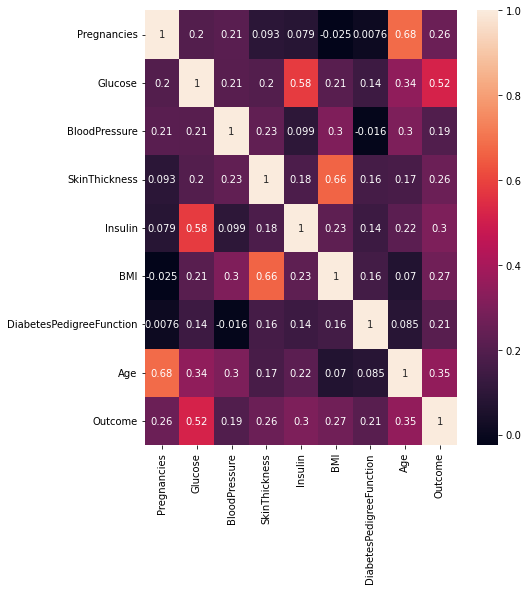

In [11]:
plt.figure(figsize=(7,8))
sns.heatmap(diabetesdata.corr(),annot=True)

# Chi Square Test

In [12]:
from sklearn.feature_selection import chi2
f1pvalues=chi2(X,Y)
f1pvalues

(array([  80.41221519,  807.60943164,   32.07557019, 3215.17250208,
          42.58525954,    3.90988424,  162.22149581]),
 array([3.03910680e-019, 1.19575836e-177, 1.48290373e-008, 0.00000000e+000,
        6.76674076e-011, 4.80029036e-002, 3.70082466e-037]))

In [13]:
np.sort(f1pvalues[0])
# the higher the f score value the more important the feature

array([   3.90988424,   32.07557019,   42.58525954,   80.41221519,
        162.22149581,  807.60943164, 3215.17250208])

In [14]:
np.sort(f1pvalues[1])
# the lower the p value the more important the feature

array([0.00000000e+000, 1.19575836e-177, 3.70082466e-037, 3.03910680e-019,
       6.76674076e-011, 1.48290373e-008, 4.80029036e-002])

In [15]:
pd.Series(f1pvalues[1], index=X.columns).sort_values()

Insulin                      0.000000e+00
Glucose                     1.195758e-177
Age                          3.700825e-37
Pregnancies                  3.039107e-19
BMI                          6.766741e-11
BloodPressure                1.482904e-08
DiabetesPedigreeFunction     4.800290e-02
dtype: float64

In [16]:
pd.Series(f1pvalues[0], index=X.columns).sort_values()

DiabetesPedigreeFunction       3.909884
BloodPressure                 32.075570
BMI                           42.585260
Pregnancies                   80.412215
Age                          162.221496
Glucose                      807.609432
Insulin                     3215.172502
dtype: float64

In [17]:
from sklearn.feature_selection import mutual_info_classif,SelectKBest
mutual_info=mutual_info_classif(X,Y)
mutual_info=pd.Series(mutual_info,X.columns)
mutual_info.sort_values()

DiabetesPedigreeFunction    0.000000
BloodPressure               0.027323
Pregnancies                 0.046105
BMI                         0.056392
Age                         0.085937
Insulin                     0.088166
Glucose                     0.148948
dtype: float64

In [18]:
sel_5=SelectKBest(mutual_info_classif,k=6)
sel_5.fit(X,Y)
X.columns[sel_5.get_support()]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age'], dtype='object')

In [19]:
# scaler = StandardScaler()
# X= scaler.fit_transform(X)
# X

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [21]:
# xgb_cls=xgboost.XGBClassifier(learning_rate =0.0001,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# classifier=LogisticRegression()
classifier=svm.SVC(probability=True,kernel='linear')
# classifier=RandomForestClassifier(n_estimators=300,max_features='sqrt',bootstrap=True)
# classifier=RandomForestClassifier(n_estimators=300)
# classifier=RandomForestClassifier(n_estimators=2,criterion="entropy")
# classifier=MLPClassifier(hidden_layer_sizes=(64,64))
classifier.fit(X_train.values,Y_train.values)
pred=classifier.predict(X_train.values)
preds=classifier.predict(X_test.values)

In [22]:
trainaccuracy=accuracy_score(Y_train,pred)
f1score= f1_score(Y_test,preds, average=None)
trainaccuracy, f1score

(0.7827476038338658, array([0.89908257, 0.7755102 ]))

In [23]:
preds

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
Y_test

715    1
700    0
325    0
648    1
128    1
      ..
169    0
617    0
63     0
395    0
709    1
Name: Outcome, Length: 79, dtype: int64

In [25]:
testaccuracy=accuracy_score(Y_test,preds)*100
testaccuracy

86.07594936708861

In [26]:
f1score=f1_score(Y_test,preds)
mae=mean_squared_error(Y_test,preds)
print(f1score,mae)

0.7755102040816326 0.13924050632911392


In [27]:
rpt=classification_report(Y_test,preds)
matrix=confusion_matrix(Y_test,preds)
print(rpt,matrix)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        53
           1       0.83      0.73      0.78        26

    accuracy                           0.86        79
   macro avg       0.85      0.83      0.84        79
weighted avg       0.86      0.86      0.86        79
 [[49  4]
 [ 7 19]]


In [57]:
sample1=[[1,89,66,23,94,28.1,21]]
sample1=[[0,137,40,35,168,43.1,2.288,33,1]]
# sample1=[5,116,74,0,0,25.6,30]
# sample1=[[6,148,72,35,0,33.6,50]]
# pregnanciesno=1
# glucose=89
# bmi=28.1
# insulin=94
# Age=21
# bloodpressure=66
# SkinThickness=23
# pedigree=0.167
pregnanciesno=1
glucose=137
bmi=45
insulin=200
Age=33
bloodpressure=300
# SkinThickness=40
pedigree=2.288
features=[pregnanciesno,glucose,bloodpressure,insulin,bmi,pedigree,Age]
features=np.array(features)
features=features.reshape(1,-1)
# features=scaler.transform(features)
predictionvalue=classifier.predict(features)
prediction=classifier.predict_proba(features)
print(predictionvalue, prediction)
if predictionvalue==1:
    print ('You have higher chances of diabetes')
else:
    print ('Minimal chances of diabetes')

[0] [[0.55123829 0.44876171]]
Minimal chances of diabetes


In [29]:
ml= "diabetespredmodelusingxgboost.pkl"
# ml= "diabetespredmodelusingxgboost.json"
md=pk.dump(classifier,open(ml,'wb'))
# import joblib as jb
# classifier.save_model(ml)
# jb.dump(classifier,ml)

In [30]:
# model =pk.load(open(ml,'rb'))
# print(model)
# # xgb_cls.load_model(ml)
# # model=jb.load(ml)
# sample1=[5,116,74,0,0,25.6,30]
# sample1=[6,148,72,35,0,33.6,50]
# sample1=np.array(sample1)
# sample1=sample1.reshape(-1,1)
# sample1=scaler.fit_transform(sample1)
# sample1=sample1.reshape(1,-1)
# print(sample1)
# model.predict(sample1)


# Insulin Threshold identification

In [31]:
x=diabetesdata[(diabetesdata.Insulin<=100) & (diabetesdata.Outcome==0)]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
32,3,88.0,58.0,11.0,54.0,24.8,0.267,22,0
40,3,180.0,64.0,25.0,70.0,34.0,0.271,26,0
50,1,103.0,80.0,11.0,82.0,19.4,0.491,22,0
...,...,...,...,...,...,...,...,...,...
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40,0
741,3,102.0,44.0,20.0,94.0,30.8,0.400,26,0
747,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0
751,1,121.0,78.0,39.0,74.0,39.0,0.261,28,0


In [32]:
np.sort(diabetesdata['Insulin'].unique())

array([ 14.,  15.,  16.,  18.,  22.,  23.,  25.,  29.,  32.,  36.,  37.,
        38.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        63.,  64.,  65.,  66.,  67.,  68.,  70.,  71.,  72.,  73.,  74.,
        75.,  76.,  77.,  78.,  79.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  90.,  91.,  92.,  94.,  95.,  96.,  99., 100., 105.,
       106., 108., 110., 112., 114., 115., 116., 119., 120., 122., 125.,
       126., 127., 128., 129., 130., 132., 135., 140., 142., 144., 145.,
       146., 148., 150., 152., 155., 156., 158., 159., 160., 165., 166.,
       167., 168., 170., 171., 175., 176., 178., 180., 182., 183., 184.,
       185., 188., 190., 191., 192., 193., 194., 196., 200., 204., 205.,
       207., 210., 215., 220., 225., 228., 230., 231., 235., 237., 240.,
       245., 249., 250., 255., 258., 265., 270., 271., 272., 274., 275.,
       277., 278., 280., 284., 285., 291., 293., 30

In [33]:
maxthreshold=diabetesdata['Insulin'].quantile(0.95)
maxthreshold

396.4999999999999

In [34]:
diabetesdata[(diabetesdata['Insulin']>=maxthreshold) & (diabetesdata['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,1
220,0,177.0,60.0,29.0,478.0,34.6,1.072,21,1
370,3,173.0,82.0,48.0,465.0,38.4,2.137,25,1
409,1,172.0,68.0,49.0,579.0,42.4,0.702,28,1
415,3,173.0,84.0,33.0,474.0,35.7,0.258,22,1
584,8,124.0,76.0,24.0,600.0,28.7,0.687,52,1
655,2,155.0,52.0,27.0,540.0,38.7,0.240,25,1


# Glucose threshold identification

In [35]:
maxthreshold=diabetesdata['Glucose'].quantile(0.95)
maxthreshold

181.0

In [36]:
np.sort(diabetesdata['Glucose'].unique())

array([ 56.,  68.,  71.,  74.,  75.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
       127., 128., 129., 130., 131., 133., 134., 135., 136., 137., 138.,
       139., 140., 141., 142., 143., 144., 145., 146., 147., 148., 149.,
       150., 151., 152., 153., 154., 155., 156., 157., 158., 160., 161.,
       162., 163., 164., 165., 166., 167., 168., 169., 170., 171., 172.,
       173., 174., 176., 177., 179., 180., 181., 184., 186., 187., 188.,
       189., 191., 193., 195., 196., 197., 198.])

In [37]:
diabetesdata[diabetesdata['Glucose']>=maxthreshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41,1
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,1
206,8,196.0,76.0,29.0,280.0,37.5,0.605,57,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
236,7,181.0,84.0,21.0,192.0,35.9,0.586,51,1
258,1,193.0,50.0,16.0,375.0,25.9,0.655,24,0
260,3,191.0,68.0,15.0,130.0,30.9,0.299,34,0
359,1,196.0,76.0,36.0,249.0,36.5,0.875,29,1


# BMI Threshold identification

In [38]:
np.sort(diabetesdata['BMI'].unique())

array([18.2, 19.3, 19.4, 19.5, 19.6, 20.1, 20.4, 20.8, 21.1, 21.2, 21.8,
       22.1, 22.2, 22.3, 22.9, 23.1, 23.2, 23.4, 23.6, 23.7, 23.8, 23.9,
       24. , 24.1, 24.2, 24.3, 24.4, 24.6, 24.7, 24.8, 25. , 25.1, 25.2,
       25.3, 25.4, 25.5, 25.6, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4,
       26.6, 26.8, 26.9, 27.1, 27.2, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9,
       28. , 28.1, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.3,
       29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4, 30.5,
       30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.6, 31.9, 32. , 32.2,
       32.4, 32.5, 32.7, 32.8, 32.9, 33.1, 33.2, 33.3, 33.6, 33.7, 33.8,
       33.9, 34. , 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9,
       35. , 35.1, 35.2, 35.3, 35.4, 35.5, 35.7, 35.8, 35.9, 36.1, 36.2,
       36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37. , 37.1, 37.2, 37.4,
       37.5, 37.6, 37.7, 37.8, 37.9, 38. , 38.1, 38.2, 38.4, 38.5, 38.6,
       38.7, 38.9, 39. , 39.1, 39.2, 39.3, 39.4, 39

In [39]:
maxthreshold=diabetesdata['BMI'].quantile(0.95)
maxthreshold

45.245

In [40]:
diabetesdata[diabetesdata['BMI']>=maxthreshold]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
92,7,81.0,78.0,40.0,48.0,46.7,0.261,42,0
99,1,122.0,90.0,51.0,220.0,49.7,0.325,31,1
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
231,6,134.0,80.0,37.0,370.0,46.2,0.238,46,1
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0


# Pregnancies threshold identification

In [41]:
np.sort(diabetesdata['Pregnancies'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17],
      dtype=int64)

In [42]:
maxthreshold=diabetesdata['Pregnancies'].quantile(0.95)
maxthreshold

10.0

In [43]:
diabetesdata[diabetesdata['Pregnancies']>=maxthreshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
24,11,143.0,94.0,33.0,146.0,36.6,0.254,51,1
25,10,125.0,70.0,26.0,115.0,31.1,0.205,41,1
28,13,145.0,82.0,19.0,110.0,22.2,0.245,57,0
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
215,12,151.0,70.0,40.0,271.0,41.8,0.742,38,1
254,12,92.0,62.0,7.0,258.0,27.6,0.926,44,1
259,11,155.0,76.0,28.0,150.0,33.3,1.353,51,1
281,10,129.0,76.0,28.0,122.0,35.9,0.280,39,0
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


# Age threshold identification

In [44]:
np.sort(diabetesdata['Age'].unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 63, 81], dtype=int64)

In [45]:
maxthreshold=diabetesdata['Age'].quantile(0.95)
maxthreshold

52.44999999999999

In [46]:
diabetesdata[diabetesdata['Age']>=maxthreshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
28,13,145.0,82.0,19.0,110.0,22.2,0.245,57,0
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
53,8,176.0,90.0,34.0,300.0,33.7,0.467,58,1
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,1
204,6,103.0,72.0,32.0,190.0,37.7,0.324,55,0
206,8,196.0,76.0,29.0,280.0,37.5,0.605,57,1
223,7,142.0,60.0,33.0,190.0,28.8,0.687,61,0


# Diabetes Pedigree Function threshold identification

In [47]:
np.sort(diabetesdata['DiabetesPedigreeFunction'].unique())

array([0.085, 0.088, 0.089, 0.101, 0.107, 0.115, 0.118, 0.122, 0.123,
       0.127, 0.128, 0.134, 0.138, 0.142, 0.143, 0.149, 0.15 , 0.153,
       0.154, 0.155, 0.156, 0.158, 0.159, 0.16 , 0.161, 0.162, 0.163,
       0.164, 0.165, 0.166, 0.167, 0.171, 0.173, 0.175, 0.176, 0.183,
       0.187, 0.189, 0.192, 0.198, 0.199, 0.203, 0.204, 0.205, 0.207,
       0.215, 0.217, 0.219, 0.221, 0.222, 0.223, 0.225, 0.229, 0.23 ,
       0.231, 0.233, 0.234, 0.235, 0.237, 0.238, 0.24 , 0.245, 0.246,
       0.247, 0.248, 0.249, 0.251, 0.254, 0.255, 0.256, 0.257, 0.258,
       0.259, 0.26 , 0.261, 0.262, 0.263, 0.264, 0.267, 0.268, 0.269,
       0.27 , 0.271, 0.279, 0.28 , 0.282, 0.283, 0.284, 0.285, 0.286,
       0.287, 0.289, 0.292, 0.293, 0.295, 0.299, 0.305, 0.306, 0.313,
       0.314, 0.315, 0.318, 0.319, 0.323, 0.324, 0.325, 0.326, 0.328,
       0.329, 0.33 , 0.332, 0.334, 0.335, 0.336, 0.337, 0.338, 0.34 ,
       0.341, 0.342, 0.344, 0.347, 0.349, 0.352, 0.356, 0.361, 0.362,
       0.364, 0.365,

In [48]:
maxthreshold=diabetesdata['DiabetesPedigreeFunction'].quantile(0.95)
maxthreshold

1.16035

In [49]:
diabetesdata[diabetesdata['DiabetesPedigreeFunction']>=maxthreshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1
147,2,106.0,64.0,35.0,119.0,30.5,1.400,34,0
152,9,156.0,86.0,28.0,155.0,34.3,1.189,42,1
187,1,128.0,98.0,41.0,58.0,32.0,1.321,33,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
243,6,119.0,50.0,22.0,176.0,27.1,1.318,33,1
259,11,155.0,76.0,28.0,150.0,33.3,1.353,51,1
292,2,128.0,78.0,37.0,182.0,43.3,1.224,31,1
308,0,128.0,68.0,19.0,180.0,30.5,1.391,25,1


# BloodPressure Threshold identification

In [50]:
np.sort(diabetesdata['BloodPressure'].unique())

array([ 24.,  30.,  38.,  40.,  44.,  46.,  48.,  50.,  52.,  54.,  56.,
        58.,  60.,  62.,  64.,  65.,  66.,  68.,  70.,  72.,  74.,  76.,
        78.,  80.,  82.,  84.,  85.,  86.,  88.,  90.,  92.,  94.,  98.,
       100., 102., 106., 110.])

In [51]:
maxthreshold=diabetesdata['BloodPressure'].quantile(0.95)
maxthreshold

90.0

In [52]:
diabetesdata[diabetesdata['BloodPressure']>=maxthreshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
24,11,143.0,94.0,33.0,146.0,36.6,0.254,51,1
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
53,8,176.0,90.0,34.0,300.0,33.7,0.467,58,1
99,1,122.0,90.0,51.0,220.0,49.7,0.325,31,1
169,3,111.0,90.0,12.0,78.0,28.4,0.495,29,0
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
187,1,128.0,98.0,41.0,58.0,32.0,1.321,33,1
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
323,13,152.0,90.0,33.0,29.0,26.8,0.731,43,1
369,1,133.0,102.0,28.0,140.0,32.8,0.234,45,1


# SkinThickness Threshold identification

In [53]:
np.sort(diabetesdata['SkinThickness'].unique())

array([ 7.,  8., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.,
       21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 56., 60., 63.])

In [54]:
maxthreshold=diabetesdata['SkinThickness'].quantile(0.95)
maxthreshold

46.44999999999999

In [55]:
diabetesdata[(diabetesdata['SkinThickness']>=maxthreshold)& (diabetesdata['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1
99,1,122.0,90.0,51.0,220.0,49.7,0.325,31,1
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
370,3,173.0,82.0,48.0,465.0,38.4,2.137,25,1
409,1,172.0,68.0,49.0,579.0,42.4,0.702,28,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
458,10,148.0,84.0,48.0,237.0,37.6,1.001,51,1
539,3,129.0,92.0,49.0,155.0,36.4,0.968,32,1
693,7,129.0,68.0,49.0,125.0,38.5,0.439,43,1
